In [ ]:
pip install finterstellar

In [1]:
import _finterstellar as fs

In [2]:
df = fs.fn_single(otp='OTP', symbol='LMT', window='T')

In [3]:
df['Avg Assets'] = ( df['Total Assets'] + df['Total Assets'].shift(4) ) /2

In [4]:
df['GP/A'] = df['Gross Profit'] / df['Avg Assets']

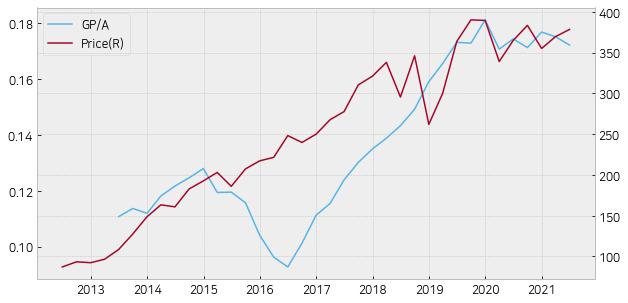

In [5]:
fs.draw_chart(df, left='GP/A', right='Price')

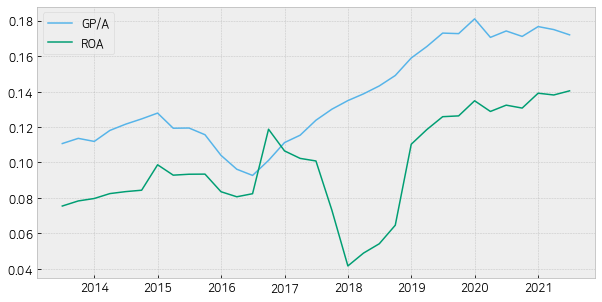

In [6]:
df['ROA'] = df['Net Income'] / df['Avg Assets']
fs.draw_chart(df, left=['GP/A', 'ROA'])

In [19]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [8]:
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2
    data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
    data[t].loc[(data[t]['Gross Profit']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'GP/A'] = float('nan')

In [9]:
s = {}
signal = {}
for t in terms:
    s[t] = fs.fn_filter(data[t], by='GP/A', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)  

In [10]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 16.81%
Accumulated return: 373.69%
Investment period: 10.0yrs
Sharpe ratio: 1.38
MDD: -44.11%


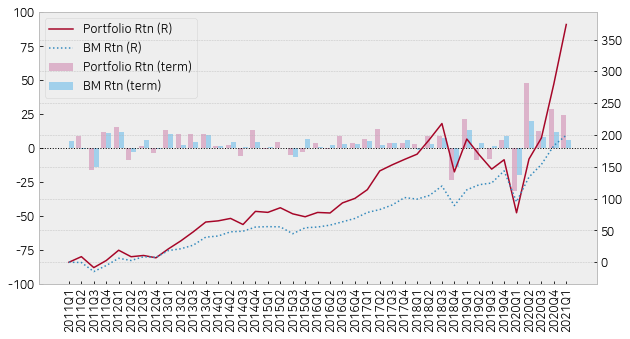

In [11]:
fs.draw_return(df)

In [12]:
# GP/A
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2
    data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
    data[t].loc[(data[t]['Gross Profit']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'GP/A'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='GP/A', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 16.81%
Accumulated return: 373.69%
Investment period: 10.0yrs
Sharpe ratio: 1.38
MDD: -44.11%


In [13]:
# PER
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
    s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 12.35%
Accumulated return: 220.78%
Investment period: 10.0yrs
Sharpe ratio: 0.70
MDD: -40.75%


In [14]:
# PER + GP/A
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
s1 = {}
s2 = {}
signal = {}
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2
    data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
    data[t].loc[(data[t]['Gross Profit']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'GP/A'] = float('nan')
    s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, cap=10, asc=True)
    s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)
    s[t] = fs.combine_score(s1[t], s2[t], n=30)    
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 8.23%
Accumulated return: 120.58%
Investment period: 10.0yrs
Sharpe ratio: 0.38
MDD: -59.98%


In [15]:
# PBR
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    s[t] = fs.fn_filter(data[t], by='PBR', floor=0.1, cap=1, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 22.70%
Accumulated return: 674.50%
Investment period: 10.0yrs
Sharpe ratio: 1.82
MDD: -37.03%


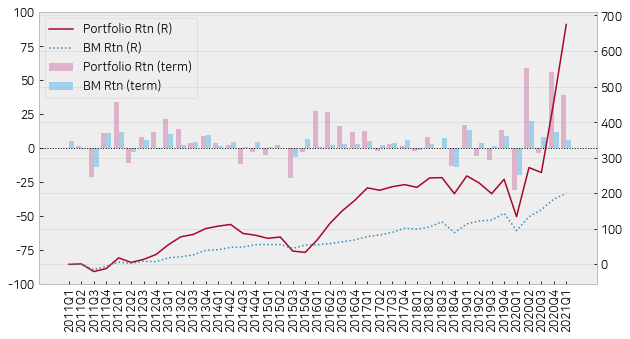

In [16]:
fs.draw_return(df)

In [17]:
# PBR + GP/A
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
s1 = {}
s2 = {}
signal = {}
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2
    data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
    data[t].loc[(data[t]['Gross Profit']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'GP/A'] = float('nan')
    s1[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=0.1, cap=1, asc=True)
    s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)  
    s[t] = fs.combine_score(s1[t], s2[t], n=30)    
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 22.31%
Accumulated return: 650.21%
Investment period: 10.0yrs
Sharpe ratio: 1.55
MDD: -53.31%


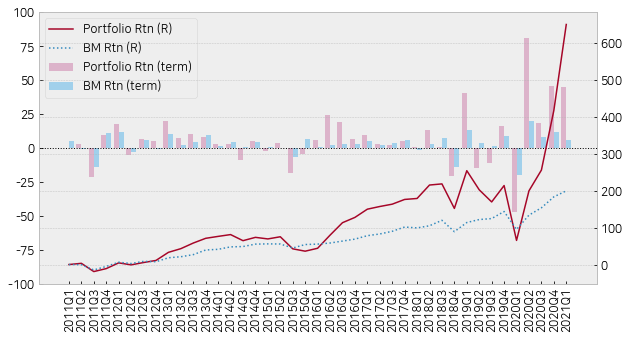

In [18]:
fs.draw_return(df)